### Simple NN (with just one layer)

5 input + 1 bias

In [6]:
# create model class
import torch
import torch.nn as nn

class Model(nn.Module):
  def __init__(self , num_features):

    super().__init__()
    self.linear = nn.Linear(num_features , 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, features):

    out = self.linear(features)
    out = self.sigmoid(out)

    return out


In [7]:
# create the dataset
features = torch.rand(10, 5)

# create model

model = Model(features.shape[1])


# call forward pass
# model.forward(features)
model(features) # same as upper code as nn module has written some magic function that automatically invokes the forward function


tensor([[0.5788],
        [0.6307],
        [0.6034],
        [0.5993],
        [0.5574],
        [0.5356],
        [0.5532],
        [0.5606],
        [0.5487],
        [0.5914]], grad_fn=<SigmoidBackward0>)

In [8]:
# show model weight
model.linear.weight

Parameter containing:
tensor([[-0.2151,  0.1146, -0.1623,  0.0473,  0.2169]], requires_grad=True)

In [9]:
# show model bias
model.linear.bias

Parameter containing:
tensor([0.3257], requires_grad=True)

In [10]:
# to visualize the network use following library
!pip install torchinfo

In [11]:
from torchinfo import summary
summary(model , input_size = (10,5))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 1]                   6
├─Sigmoid: 1-2                           [10, 1]                   --
Total params: 6
Trainable params: 6
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

### NN with 5 inputs and a hidden layer that has three neurons and a output layer

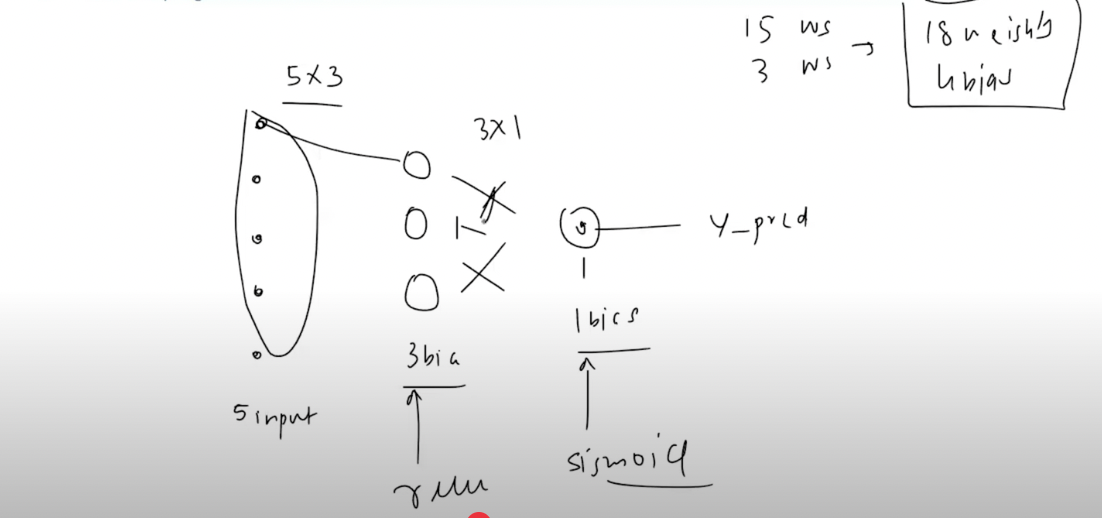

In [15]:
# create model class
import torch
import torch.nn as nn

class Model(nn.Module):
  def __init__(self , num_features):

    super().__init__()
    self.linear1 = nn.Linear(num_features , 3)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(3 , 1)
    self.sigmoid = nn.Sigmoid()


  def forward(self, features):

    out = self.linear1(features)
    out = self.relu(out)
    out = self.linear2(out)
    out = self.sigmoid(out)

    return out


In [16]:
# create the dataset
features = torch.rand(10, 5)

# create model

model = Model(features.shape[1])


# call forward pass
model(features)

tensor([[0.4777],
        [0.4871],
        [0.4968],
        [0.4929],
        [0.5039],
        [0.4957],
        [0.4854],
        [0.4951],
        [0.5082],
        [0.4826]], grad_fn=<SigmoidBackward0>)

In [18]:
# show model weight of specific layer
model.linear1.weight
model.linear2.weight

Parameter containing:
tensor([[-0.0959,  0.2747, -0.1430]], requires_grad=True)

In [20]:
# show model bias of specific layer
model.linear1.bias
model.linear2.bias

Parameter containing:
tensor([0.0803], requires_grad=True)

In [21]:
from torchinfo import summary
summary(model , input_size = (10,5))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 3]                   18
├─ReLU: 1-2                              [10, 3]                   --
├─Linear: 1-3                            [10, 1]                   4
├─Sigmoid: 1-4                           [10, 1]                   --
Total params: 22
Trainable params: 22
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

### Same thing using seequential conatainer

In [23]:
# create model class
import torch
import torch.nn as nn

class Model(nn.Module):
  def __init__(self , num_features):

    super().__init__()
    self.network = nn.Sequential(

      nn.Linear(num_features , 3),
      nn.ReLU(),
      nn.Linear(3 , 1),
      nn.Sigmoid()
    )


  def forward(self, features):

    out = self.network(features)

    return out


In [24]:
# create the dataset
features = torch.rand(10, 5)

# create model

model = Model(features.shape[1])


# call forward pass
model(features)

tensor([[0.4576],
        [0.4587],
        [0.4624],
        [0.4236],
        [0.4418],
        [0.4925],
        [0.4657],
        [0.5182],
        [0.4654],
        [0.4310]], grad_fn=<SigmoidBackward0>)

In [32]:
# show model weight of specific layer
model.network[0].weight
model.network[2].weight



Parameter containing:
tensor([[-0.3790, -0.4505, -0.2488]], requires_grad=True)

In [33]:
# show model bias of specific layer
model.network[0].bias
model.network[2].bias

Parameter containing:
tensor([0.0728], requires_grad=True)

In [34]:
model.network

Sequential(
  (0): Linear(in_features=5, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=1, bias=True)
  (3): Sigmoid()
)

In [35]:
from torchinfo import summary
summary(model , input_size = (10,5))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Sequential: 1-1                        [10, 1]                   --
│    └─Linear: 2-1                       [10, 3]                   18
│    └─ReLU: 2-2                         [10, 3]                   --
│    └─Linear: 2-3                       [10, 1]                   4
│    └─Sigmoid: 2-4                      [10, 1]                   --
Total params: 22
Trainable params: 22
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00